# Assignment 2(due on 11/08)

## Student:郑炜（12332242），Gtihub：fytctctvy

## 批改人：吴昊天

## 得分：45/50

### PS1. Significant earthquakes since 2150 B.C.

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# 1. Significant earthquakes since 2150 B.C.
Sig_Eqs = pd.read_csv('earthquakes-2023-11-01_21-34-03_+0800.tsv', sep='\t')

# 1.1 先根据国家对数据分组，分别计算每个组的死亡总数，再从大到小排序前10个国家
Sig_Eqs.groupby(['Country']).sum()['Deaths'].sort_values(ascending=False)[0:10]
# 以下是助教添加
Sig_Eqs.groupby(['Country']).sum()['Total Deaths'].sort_values(ascending=False)[0:10] 

Country
CHINA         2041929.0
TURKEY         995648.0
IRAN           758650.0
SYRIA          437700.0
ITALY          422679.0
JAPAN          356083.0
HAITI          323776.0
AZERBAIJAN     310119.0
INDONESIA      282819.0
ARMENIA        189000.0
Name: Total Deaths, dtype: float64

d:\software\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\software\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\software\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Total Number')

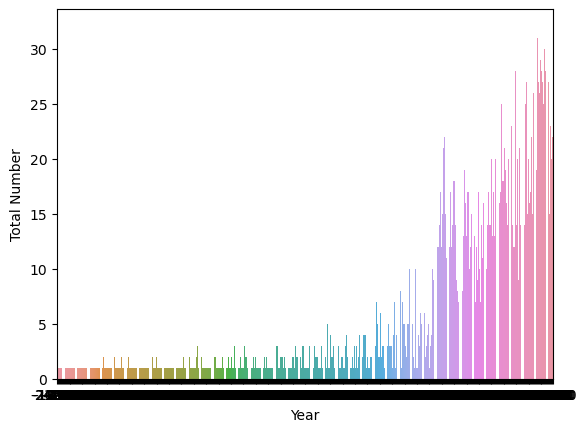

In [3]:
# 1.2 提取地震震级大于6的数据，再根据其发生的年份，进行频数的计算
#方法一
Sig_Eqs2 = Sig_Eqs.loc[ Sig_Eqs['Mag'] > 6.0]
SIG = Sig_Eqs2['Year'].value_counts()
# seaborn参考以下网址：https://www.zhihu.com/tardis/zm/art/462606364?source_id=1005
ax = sns.barplot(y=SIG.values, x=SIG.index)
plt.ylabel('Total Number')
# 不知道为什么用这种方式画图，一调xtick，整个图分布就变得很奇怪,下面用另一个方法画
#根据结果发现，地震发生的次数逐年上升，可能是由于板块运动加剧，造成地震频发

Text(0, 0.5, 'Total Number')

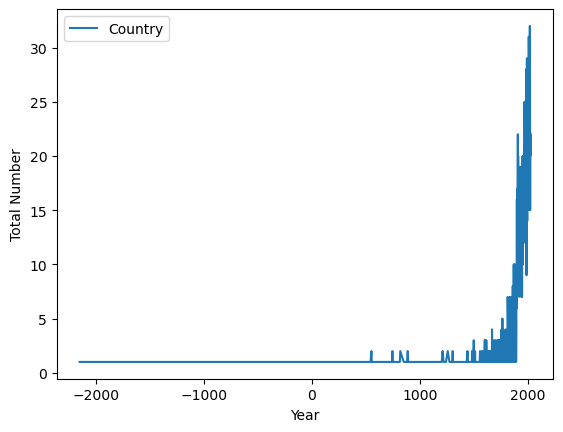

In [4]:
# 1.2 提取地震震级大于6的数据，再根据其发生的年份分组，进行频数的计算，直接画图
#方法二
Sig_Eqs.loc[ Sig_Eqs['Mag'] > 6.0].groupby(['Year']).count().loc[:,['Country']].plot()
plt.ylabel('Total Number')

(-2250.0, 2023.0)

<Figure size 640x480 with 0 Axes>

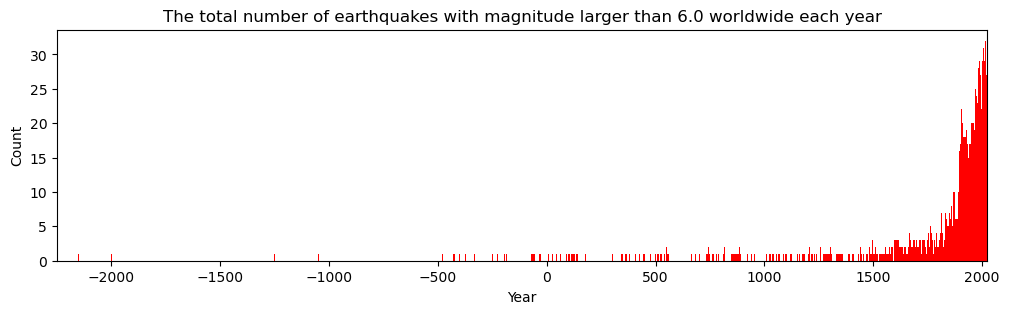

In [5]:
# 助教提供的参考代码
Sig_Eqs_2 = Sig_Eqs.loc[Sig_Eqs['Mag']>6.0].groupby(['Year']).count()['Mag']
plt.figure(2)
plt.figure(figsize=(12,3))
plt.bar(Sig_Eqs_2.index,Sig_Eqs_2,width=5,color='red')
plt.title(u'The total number of earthquakes with magnitude larger than 6.0 worldwide each year') #
plt.ylabel('Count') 
plt.xlabel('Year')
plt.xlim([min(Sig_Eqs_2.index)-100,max(Sig_Eqs_2.index)])

In [6]:
#1.3 
df = Sig_Eqs.loc[:,['Country','Mag','Year','Mo','Dy']]
Country_List=Sig_Eqs.groupby(['Country']).count().reset_index()

def CountEq_LargestEq(C):
    Total_Number = df.groupby(['Country']).count()['Year'][C]
    Largest_Eqs = df.loc[(df['Country']==C)&(df['Mag']==df.groupby(['Country']).max()['Mag'][C])]
    D=Largest_Eqs[['Mag','Year','Mo','Dy']]
    return (Total_Number,D)

for i in Country_List['Country']: 
      print(i,CountEq_LargestEq(i))
#以下结果：国家下每行数字依次表示为此国家的（地震发生次数，最大地震级数，最大地震发生的年，月，日）

AFGHANISTAN (66,       Mag    Year   Mo   Dy
2727  8.1  1909.0  7.0  7.0)
ALBANIA (56,       Mag    Year   Mo    Dy
2395  7.5  1893.0  6.0  14.0)
ALGERIA (57,       Mag    Year    Mo    Dy
4449  7.1  1980.0  10.0  10.0)
ANTARCTICA (5,       Mag    Year   Mo    Dy
5010  8.1  1998.0  3.0  25.0)
ANTIGUA AND BARBUDA (3,       Mag    Year   Mo    Dy
1054  8.0  1690.0  4.0  16.0)
ARGENTINA (21,       Mag    Year   Mo    Dy
3492  7.8  1944.0  1.0  15.0)
ARMENIA (13,       Mag    Year    Mo   Dy
4704  6.8  1988.0  12.0  7.0)
ATLANTIC OCEAN (6,       Mag    Year    Mo    Dy
3445  7.8  1941.0  11.0  25.0
4280  7.8  1975.0   5.0  26.0)
AUSTRALIA (24,       Mag    Year   Mo    Dy
4715  8.2  1989.0  5.0  23.0)
AUSTRIA (7,      Mag    Year   Mo    Dy
752  6.6  1590.0  9.0  15.0)
AZERBAIJAN (16,       Mag    Year    Mo    Dy
975   6.9  1667.0  11.0   NaN
2552  6.9  1902.0   2.0  13.0)
AZORES (PORTUGAL) (27,       Mag    Year   Mo    Dy
4067  7.6  1968.0  2.0  28.0)
BANGLADESH (17,       Mag    Year  

In [7]:
#1.3 
#助教修改代码
df = Sig_Eqs.loc[:,['Country','Mag','Year','Mo','Dy']]
Country_List=Sig_Eqs.groupby(['Country']).count().reset_index()

def CountEq_LargestEq(C):
    Total_Number = df.groupby(['Country']).count()['Year'][C]
    Largest_Eqs = df.loc[(df['Country']==C)&(df['Mag']==df.groupby(['Country']).max()['Mag'][C])]
    D=Largest_Eqs[['Year','Mo','Dy']]
    return (Total_Number,D)
results = []
for i in Country_List['Country']: 
    total_earthquakes,largest_earthquake_date = CountEq_LargestEq(i)
    results.append({'Country': i, 'Total Earthquakes': total_earthquakes, 'Largest Earthquake Date': largest_earthquake_date})
    
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Total Earthquakes', ascending=0)
results_df.head(20)
#以下结果：国家下每行数字依次表示为此国家的（地震发生次数，最大地震级数，最大地震发生的年，月，日）

,Country,Total Earthquakes,Largest Earthquake Date
28,CHINA,620,Year Mo Dy 982 1668.0 7.0 25.0
71,JAPAN,414,Year Mo Dy 5743 2011.0 3.0 11.0
64,INDONESIA,411,Year Mo Dy 5341 2004.0 12.0 26.0
65,IRAN,384,Year Mo Dy 238 856.0 12.0 22.0
140,TURKEY,335,Year Mo Dy 3413 1939.0 12.0 2...
69,ITALY,331,Year Mo Dy 2842 1915.0 1.0 13.0
147,USA,276,Year Mo Dy 3957 1964.0 3.0 28.0
53,GREECE,270,Year Mo Dy 118 365.0 7.0 21.0 ...
107,PHILIPPINES,224,Year Mo Dy 2475 1897.0 9.0 21.0
86,MEXICO,209,Year Mo Dy 2496 1899.0 1.0 24.0


### 代码基本正确，功能基本满足要求，分析内容合理
### 1.1中，应统计 Total deaths 而不是 Deaths，助教已添加代码给您参考。
### 1.2中，注意在绘制6级以上的地震次数图件时，横坐标年份并不是均匀的，如果抽选横坐标刻度绘制，容易有歧义。助教已添加代码给您参考。
### 1.3中，CountEq_LargestEq()函数需要输出地震数量和最大地震的日期，目前的函数输出的内容太多。并且题干要求降序报告结果。助教已修改了代码给您参考。
### 得分：21/25
### --------------------------------------------------------------------------------------------

### PS2. Wind speed in Shenzhen during the past 10 years

C:\Users\Wu\AppData\Local\Temp\ipykernel_16140\3889934635.py:3: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  BA = pd.read_csv('2281305.csv')
C:\Users\Wu\AppData\Local\Temp\ipykernel_16140\3889934635.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BA1['ws']=BA1['ws'].astype(float) /10
C:\Users\Wu\AppData\Local\Temp\ipykernel_16140\3889934635.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BA2['month']=BA1['month

Text(0, 0.5, 'Wind Speed(m/s)')

<Figure size 1200x600 with 0 Axes>

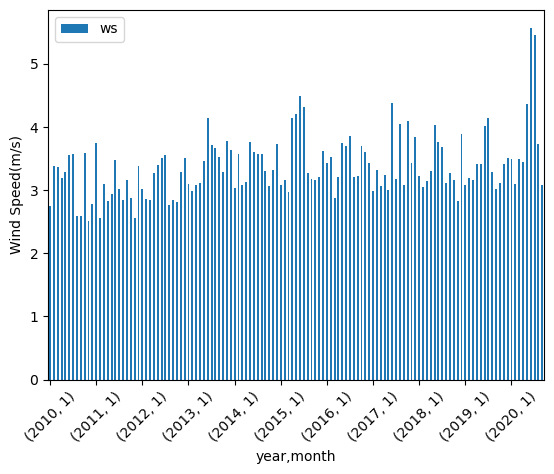

In [8]:
#2 
#参考网页：https://blog.csdn.net/chenhepg/article/details/118799729
BA = pd.read_csv('2281305.csv')
BA['ws']=BA['WND'].str.split(',').str[3]
BA['year']=pd.to_datetime(BA['DATE'].str.split('T').str[0]).dt.year
BA['month']=pd.to_datetime(BA['DATE'].str.split('T').str[0]).dt.month

plt.figure(figsize=(12,6)) 
fig,ax = plt.subplots()
BA1=BA.loc[(BA['ws']!="9999")]
BA1['ws']=BA1['ws'].astype(float) /10
BA2=BA1[['year']]
BA2['month']=BA1['month']
BA2['ws']=BA1['ws']
BA2.groupby([BA2['year'],BA2['month']]).mean('ws').plot(kind='bar',ax=ax)
plt.xticks(range(0,129,12),rotation=45)
plt.ylabel('Wind Speed(m/s)')
#根据结果看，近几年风速的总体趋势没有明显变化，仅在2020年有两个月风速较高

### 代码运行结果正确，分析内容合理
### 得分 10/10
### ---------------------------------------------------------------------------------------------

### PS3. Explore a data set

In [9]:
# 3 
#3.1 读取数据后，先将新建列表示数据的时间（月.日.时），然后新建去除空值，及小于0的无效值后的表格为：UAV1
UAV = pd.read_csv('non_flight_ground_base.csv')
UAV['day'] = pd.to_datetime(UAV['UAV_data'].str.split(' ').str[0]).dt.day
UAV['month'] = pd.to_datetime(UAV['UAV_data'].str.split(' ').str[0]).dt.month
UAV['hour'] = pd.to_datetime(UAV['UAV_data'].str.split(' ').str[1]).dt.hour
UAV = UAV.loc[(UAV['UAV_O3']!=" ")&(UAV['UAV_O3']>0)]
UAV

C:\Users\Wu\AppData\Local\Temp\ipykernel_16140\3135320789.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  UAV['hour'] = pd.to_datetime(UAV['UAV_data'].str.split(' ').str[1]).dt.hour


,UAV_data,UAV_POM_O3,UAV_CO,UAV_NO2,UAV_PM2_5,UAV_PM10,UAV_O3,ground_POM_O3,ground_CO,ground_nNO2,...,ground_PM10,ground_O3,CO,PM?.?,PM??,O?,NO?,day,month,hour
3,07/18/2023 13:37:00,14.120000,0.512629,0.266414,6.766667,6.766667,26.219293,NaN,NaN,NaN,...,NaN,NaN,0.379,5.512,7.059,50.443,101.297,18,7,13
4,07/18/2023 15:08:00,11.760000,0.635892,4.419332,9.000000,9.000000,77.130483,NaN,NaN,NaN,...,NaN,NaN,0.369,9.259,11.185,100.008,54.113,18,7,15
5,07/18/2023 15:09:00,10.556667,0.636496,9.559548,11.766667,12.166667,74.148364,NaN,NaN,NaN,...,NaN,NaN,0.359,8.676,11.174,95.490,45.764,18,7,15
6,07/18/2023 15:10:00,8.880000,0.635771,13.963209,11.000000,11.833333,75.870204,NaN,NaN,NaN,...,NaN,NaN,0.376,8.814,11.180,93.172,51.641,18,7,15
7,07/18/2023 15:11:00,6.623333,0.627433,7.130483,11.100000,11.900000,64.261032,NaN,NaN,NaN,...,NaN,NaN,0.381,9.110,11.228,97.413,69.602,18,7,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5924,08/02/2023 23:20:00,-9.776667,0.454985,0.940283,2.466667,2.466667,45.164466,NaN,NaN,NaN,...,NaN,NaN,0.402,7.187,13.967,58.067,35.797,2,8,23
5925,08/02/2023 23:21:00,0.620000,0.455590,52.326775,7.433333,7.733333,91.567997,NaN,NaN,NaN,...,NaN,NaN,0.403,7.187,13.969,58.944,37.737,2,8,23
5926,08/02/2023 23:22:00,14.816667,0.473716,84.484468,14.100000,14.733333,102.702991,NaN,NaN,NaN,...,NaN,NaN,0.410,7.187,13.979,59.080,43.153,2,8,23
5927,08/02/2023 23:23:00,18.393333,0.504895,74.235379,13.066667,13.500000,93.878012,NaN,NaN,NaN,...,NaN,NaN,0.422,7.187,13.979,59.804,27.954,2,8,23


Text(0, 0.5, 'Conc.(µg/m3)')

<Figure size 1500x800 with 0 Axes>

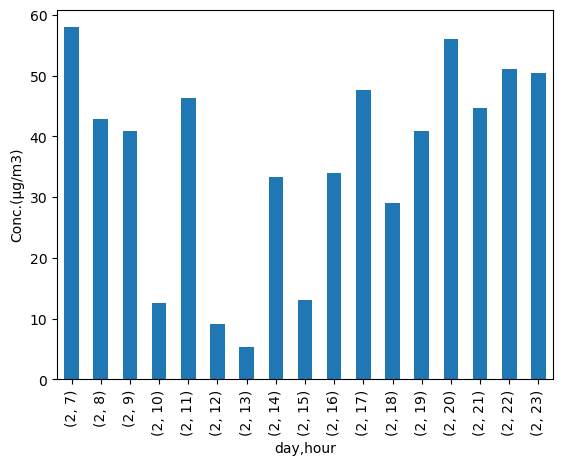

In [10]:
#3.2 对2号的NO2的数据作图，看其小时平均浓度
UAV1 = UAV.loc[(UAV['day']== 2)]
plt.figure(figsize=(15,8))
fig,ax = plt.subplots()
UAV1['UAV_NO2'].groupby([UAV1['day'],UAV1['hour']]).mean('UAV_NO2').plot(kind='bar',ax=ax)
plt.ylabel('Conc.(µg/m3)')

In [11]:
#3.3
#Check1 剔除异常值后在所有观测天中:臭氧最大值(指UAV上测到的值)
UAV["UAV_O3"].max()

218.4220763

In [12]:
#3.3
#Check2 剔除异常值后8月2日一天内:NO2浓度最小值(指UAV上测到的值)
UAV1["UAV_NO2"].min()

0.109699733

In [13]:
#3.3
#Check3 剔除异常值后8月2日一天内:PM2.5日平均浓度(指UAV上测到的值)
UAV1["UAV_PM2_5"].mean()

14.5613019417997

In [14]:
#3.3
#Check4 剔除异常值后8月2日一天内:CO小时平均浓度(指UAV上测到的值)
UAV1["UAV_CO"].median()

0.541027667

In [15]:
#3.3
#Check5 剔除异常值后8月2日一天内:CO小时平均浓度(指UAV上测到的值)
UAV1['UAV_CO'].groupby([UAV1['day'],UAV1['hour']]).mean('UAV_CO')

day  hour
2    7       0.546214
     8       0.510623
     9       0.502829
     10      0.494464
     11      0.557078
     12      0.505844
     13      0.514554
     14      0.559367
     15      0.536459
     16      0.557491
     17      0.587431
     18      0.560989
     19      0.574486
     20      0.578153
     21      0.549125
     22      0.538039
     23      0.503722
Name: UAV_CO, dtype: float64

### 代码运行结果正确，数据预处理正确，绘制图件正确，统计检查正确。题干中要求“report your findings.”。
### 得分 14/15
### ---------------------------------------------------------------------------------------------